<a href="https://colab.research.google.com/github/santiagofigueroaluchetti/LAB02_GRUPOB02/blob/main/EJERCICIO2_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 2 (Patrones secuenciales)

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import mlxtend
from mlxtend.frequent_patterns import apriori
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import mlxtend
from mlxtend.frequent_patterns import apriori
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

# Importar el archivo exel
archivo_excel = 'Online Retail.xlsx'

# Lee el archivo .xlsx
datos_excel = pd.read_excel(archivo_excel)

# Ahora, los datos están almacenados en un DataFrame llamado datos_excel
# Puedes imprimir el DataF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(datos_excel)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Lo primero que vamos a hacer antes de tratar con los datos es eliminar las filas con valores nulos en las columnas relevantes, como tras ver el excel vemos que no hay ninguna fila con valores nulo no hace falta que eliminemos nada.

In [ ]:
datos_excel['InvoiceDate'] = pd.to_datetime(datos_excel['InvoiceDate'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(datos_excel)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

## Configuracion 1

In [ ]:
# Agrupar las transacciones por cliente y generar la secuencia de compras
clientes = datos_excel.groupby('CustomerID')['Description'].apply(list).reset_index(name='TransactionSequence')

# Convertir todos los elementos de las transacciones a cadenas
clientes['TransactionSequence'] = clientes['TransactionSequence'].apply(lambda x: list(map(str, x)))

# Convertir la secuencia de transacciones a un formato adecuado para mlxtend
te = TransactionEncoder()
te_ary = te.fit(clientes['TransactionSequence']).transform(clientes['TransactionSequence'])
transactions = pd.DataFrame(te_ary, columns=te.columns_)

# Encontrar patrones frecuentes usando FP-Growth
frequent_patterns = fpgrowth(transactions, min_support=0.1, use_colnames=True)

# Imprimir los patrones frecuentes encontrados
print(frequent_patterns)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     support                              itemsets
0   0.203111            (REGENCY CAKESTAND 3 TIER)
1   0.103156                  (RABBIT NIGHT LIGHT)
2   0.146615   (SET OF 3 CAKE TINS PANTRY DESIGN )
3   0.131519            (JAM MAKING SET WITH JARS)
4   0.108417     (RECIPE BOX PANTRY YELLOW DESIGN)
5   0.134035       (BAKING SET 9 PIECE RETROSPOT )
6   0.130833                      (SPOTTY BUNTING)
7   0.108188          (SET OF 3 REGENCY CAKE TINS)
8   0.121912             (LUNCH BAG RED RETROSPOT)
9   0.102013             (LUNCH BAG PINK POLKADOT)
10  0.145700     (PACK OF 72 RETROSPOT CAKE CASES)
11  0.108646          (HOT WATER BOTTLE KEEP CALM)
12  0.162168                       (PARTY BUNTING)
13  0.145700             (JUMBO BAG RED RETROSPOT)
14  0.123285              (JAM MAKING SET PRINTED)
15  0.102928                  (VINTAGE SNAP CARDS)
16  0.112077    (RETROSPOT TEA SET CERAMIC 11 PC )
17  0.112534          (LUNCH BAG SPACEBOY DESIGN )
18  0.110247                 (L


El "support" (soporte) en el contexto de la minería de datos y la extracción de reglas de asociación como FP-Growth es una medida de la frecuencia con la que aparece un conjunto de elementos en un conjunto de transacciones.

In [ ]:
!pip install gsppy
!pip install prefixspan-python
!pip install pymining
!pip install sequence-mining

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ERROR: Could not find a version that satisfies the requirement prefixspan-python (from versions: none)
ERROR: No matching distribution found for prefixspan-python
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.4/242.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491058 sha256=02024c3a7c6710683ea65e1869f842acf16759b9657128f0046abb6146f0fc37
  Stored in directory: /root/.cache/pip/wheels/22/73/06/557dc4f4ef68179b9d763930d6eec26b88ed7c389b19588a1c
Successfully built future
  Attempting uninstall: future
    Found existing installation: future 0.18.3
    Uninstalling future-0.18.3:
      Successfully uninstalled future-0.18.3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


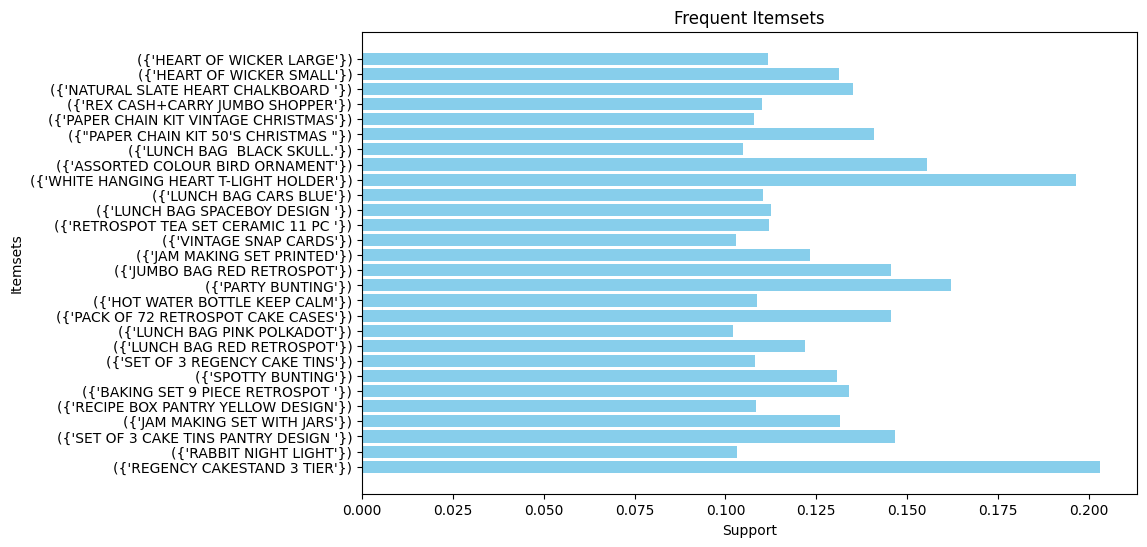

In [ ]:

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Eliminar "frozenset" y convertir los itemsets a strings
frequent_patterns['itemsets'] = frequent_patterns['itemsets'].apply(lambda x: str(x).replace("frozenset", ""))

# Extraer los itemsets y sus soportes
itemsets = frequent_patterns['itemsets']
support = frequent_patterns['support']

# Graficar los itemsets y sus soportes
ax.barh(itemsets, support, color='skyblue')

# Añadir etiquetas y título
ax.set_xlabel('Support')
ax.set_ylabel('Itemsets')
ax.set_title('Frequent Itemsets')

# Mostrar la gráfica
plt.show()

In [ ]:
print(clientes.head())

   CustomerID                                TransactionSequence
0       12346  [MEDIUM CERAMIC TOP STORAGE JAR, MEDIUM CERAMI...
1       12347  [BLACK CANDELABRA T-LIGHT HOLDER, AIRLINE BAG ...
2       12348  [72 SWEETHEART FAIRY CAKE CASES, 60 CAKE CASES...
3       12349  [PARISIENNE CURIO CABINET, SWEETHEART WALL TID...
4       12350  [CHOCOLATE THIS WAY METAL SIGN, METAL SIGN NEI...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("La forma del DataFrame 'transactions' es:", transactions.shape)
print(transactions)


La forma del DataFrame 'transactions' es: (4372, 4224)
       4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
0                              False                           False   
1                              False                           False   
2                              False                           False   
3                              False                           False   
4                              False                           False   
...                              ...                             ...   
4367                           False                           False   
4368                           False                           False   
4369                           False                           False   
4370                           False                           False   
4371                           False                           False   

       DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
0                  Fal

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("La forma del DataFrame 'transactions' es:", frequent_patterns.shape)
print(frequent_patterns)



La forma del DataFrame 'transactions' es: (28, 2)
     support                                  itemsets
0   0.203111            ({'REGENCY CAKESTAND 3 TIER'})
1   0.103156                  ({'RABBIT NIGHT LIGHT'})
2   0.146615   ({'SET OF 3 CAKE TINS PANTRY DESIGN '})
3   0.131519            ({'JAM MAKING SET WITH JARS'})
4   0.108417     ({'RECIPE BOX PANTRY YELLOW DESIGN'})
5   0.134035       ({'BAKING SET 9 PIECE RETROSPOT '})
6   0.130833                      ({'SPOTTY BUNTING'})
7   0.108188          ({'SET OF 3 REGENCY CAKE TINS'})
8   0.121912             ({'LUNCH BAG RED RETROSPOT'})
9   0.102013             ({'LUNCH BAG PINK POLKADOT'})
10  0.145700     ({'PACK OF 72 RETROSPOT CAKE CASES'})
11  0.108646          ({'HOT WATER BOTTLE KEEP CALM'})
12  0.162168                       ({'PARTY BUNTING'})
13  0.145700             ({'JUMBO BAG RED RETROSPOT'})
14  0.123285              ({'JAM MAKING SET PRINTED'})
15  0.102928                  ({'VINTAGE SNAP CARDS'})
16  0.112077   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from collections import defaultdict

# Inicializar el diccionario para contar las ocurrencias de pares de productos
ocurrencias_pares = defaultdict(int)

# Iterar sobre las transacciones y contar las ocurrencias de pares de productos
for _, transaction in transactions.iterrows():
    transaction_items = set(transactions.columns[transaction])
    for producto1 in transaction_items:
        for producto2 in transaction_items:
            if producto1 != producto2:
                ocurrencias_pares[tuple(sorted([producto1, producto2]))] += 1

# Ordenar los pares de productos por número de ocurrencias en orden descendente
pares_ordenados = sorted(ocurrencias_pares.items(), key=lambda x: x[1], reverse=True)

# Imprimir los pares de productos más comunes
for par, count in pares_ordenados[:10]:  # Mostrar los 10 pares más comunes
    print("Pareja de productos:", par)
    print("Transacciones en las que aparece juntos:", count)
    print("\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pareja de productos: ("PAPER CHAIN KIT 50'S CHRISTMAS ", 'PAPER CHAIN KIT VINTAGE CHRISTMAS')
Transacciones en las que aparece juntos: 656


Pareja de productos: ('REGENCY CAKESTAND 3 TIER', 'ROSES REGENCY TEACUP AND SAUCER ')
Transacciones en las que aparece juntos: 650


Pareja de productos: ('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER ')
Transacciones en las que aparece juntos: 650


Pareja de productos: ('RED HANGING HEART T-LIGHT HOLDER', 'WHITE HANGING HEART T-LIGHT HOLDER')
Transacciones en las que aparece juntos: 626


Pareja de productos: ('HEART OF WICKER LARGE', 'HEART OF WICKER SMALL')
Transacciones en las que aparece juntos: 620


Pareja de productos: ('LUNCH BAG CARS BLUE', 'LUNCH BAG RED RETROSPOT')
Transacciones en las que aparece juntos: 618


Pareja de productos: ('REGENCY CAKESTAND 3 TIER', 'SET OF 3 REGENCY CAKE TINS')
Transacciones en las que aparece juntos: 608


Pareja de productos: ('LUNCH BAG RED RETROSPOT', 'LUNCH BAG SPACEBOY DESIGN ')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


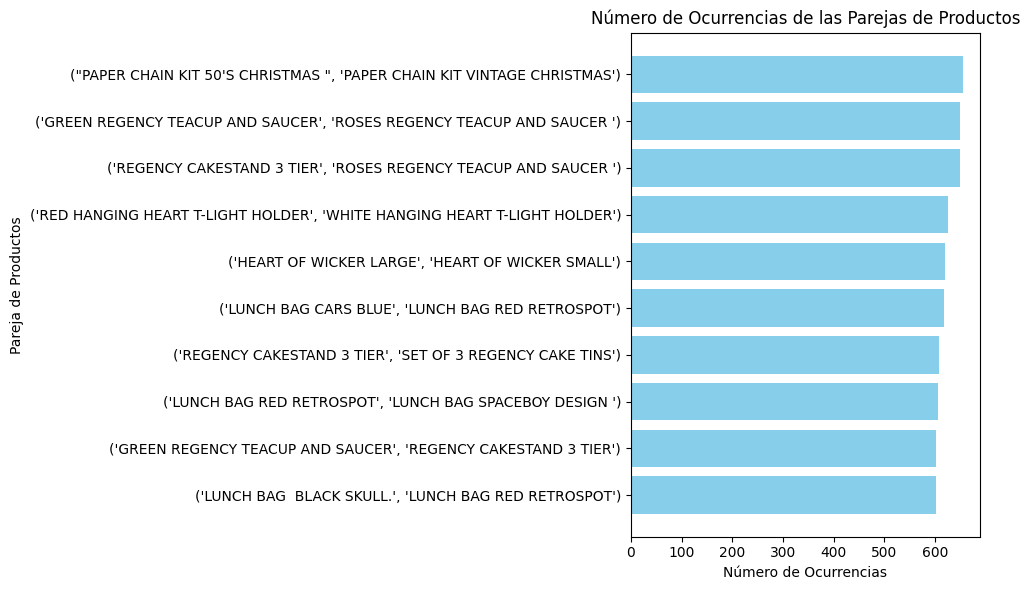

In [ ]:
# Definir las parejas de productos y sus ocurrencias
parejas_productos = [
    ("PAPER CHAIN KIT 50'S CHRISTMAS ", "PAPER CHAIN KIT VINTAGE CHRISTMAS"),
    ('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '),
    ('REGENCY CAKESTAND 3 TIER', 'ROSES REGENCY TEACUP AND SAUCER '),
    ('RED HANGING HEART T-LIGHT HOLDER', 'WHITE HANGING HEART T-LIGHT HOLDER'),
    ('HEART OF WICKER LARGE', 'HEART OF WICKER SMALL'),
    ('LUNCH BAG CARS BLUE', 'LUNCH BAG RED RETROSPOT'),
    ('REGENCY CAKESTAND 3 TIER', 'SET OF 3 REGENCY CAKE TINS'),
    ('LUNCH BAG RED RETROSPOT', 'LUNCH BAG SPACEBOY DESIGN '),
    ('GREEN REGENCY TEACUP AND SAUCER', 'REGENCY CAKESTAND 3 TIER'),
    ('LUNCH BAG  BLACK SKULL.', 'LUNCH BAG RED RETROSPOT')
]
ocurrencias = [656, 650, 650, 626, 620, 618, 608, 606, 602, 602]

# Crear la gráfica de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh([str(pair) for pair in parejas_productos], ocurrencias, color='skyblue')
plt.xlabel('Número de Ocurrencias')
plt.ylabel('Pareja de Productos')
plt.title('Número de Ocurrencias de las Parejas de Productos')
plt.gca().invert_yaxis()  # Invertir el eje y para que la pareja de productos superior esté en la parte superior
plt.tight_layout()
plt.show()